In [1]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.stattools import acf , pacf #Observing Auto correlation and partial correlation function

In [2]:
data = pd.read_csv(r"C:\Users\Adhula\Downloads\AirQuality.csv", sep = ";")

In [3]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
data.drop(['Unnamed: 15' , 'Unnamed: 16'] , axis = 1 , inplace = True)

In [5]:
colname = ['Date' , 'Time' , 'Carbon_Monoxide' , 'Tin oxide' , 'Non Metanic HydroCarbons' , 'Benzene' , 'Titania' , 'Nox' , 'Tungsten oxide' , 'Nitrous Oxide' , 'Tungsten oxide No2' , 'Indium Oxide' , 'Temperature' , 'Rel Humidity' , 'Absolute Humidity']

In [6]:
data.columns = colname

In [7]:
data.head()

,Date,Time,Carbon_Monoxide,Tin oxide,Non Metanic HydroCarbons,Benzene,Titania,Nox,Tungsten oxide,Nitrous Oxide,Tungsten oxide No2,Indium Oxide,Temperature,Rel Humidity,Absolute Humidity
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [8]:
#cleaning data
data.replace(',' , '.' , regex = True  , inplace = True)

In [10]:
data.dropna(axis = 0 , inplace = True)

In [11]:
cat= data.select_dtypes(exclude = ['int' , 'float']).columns

In [12]:
cat = list(cat[2:])

In [13]:
for feature in cat:
    data[feature] = data[feature].astype('float64')

In [14]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True) 

In [15]:
data['Time'] = pd.to_datetime(data['Time'],format= '%H.%M.%S' ).dt.time

In [17]:
columns = ['Temperature' , 'Rel Humidity' , 'Absolute Humidity','Date' , 'Time' , 'Carbon_Monoxide' , 'Tin oxide' , 'Benzene' ]

In [18]:
data = data[columns]

In [19]:
data.head()

,Date,Time,Carbon_Monoxide,Tin oxide,Benzene,Temperature,Rel Humidity,Absolute Humidity
0,2004-03-10,18:00:00,2.6,1360.0,11.9,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,9.4,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,9.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,9.2,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,6.5,11.2,59.6,0.7888


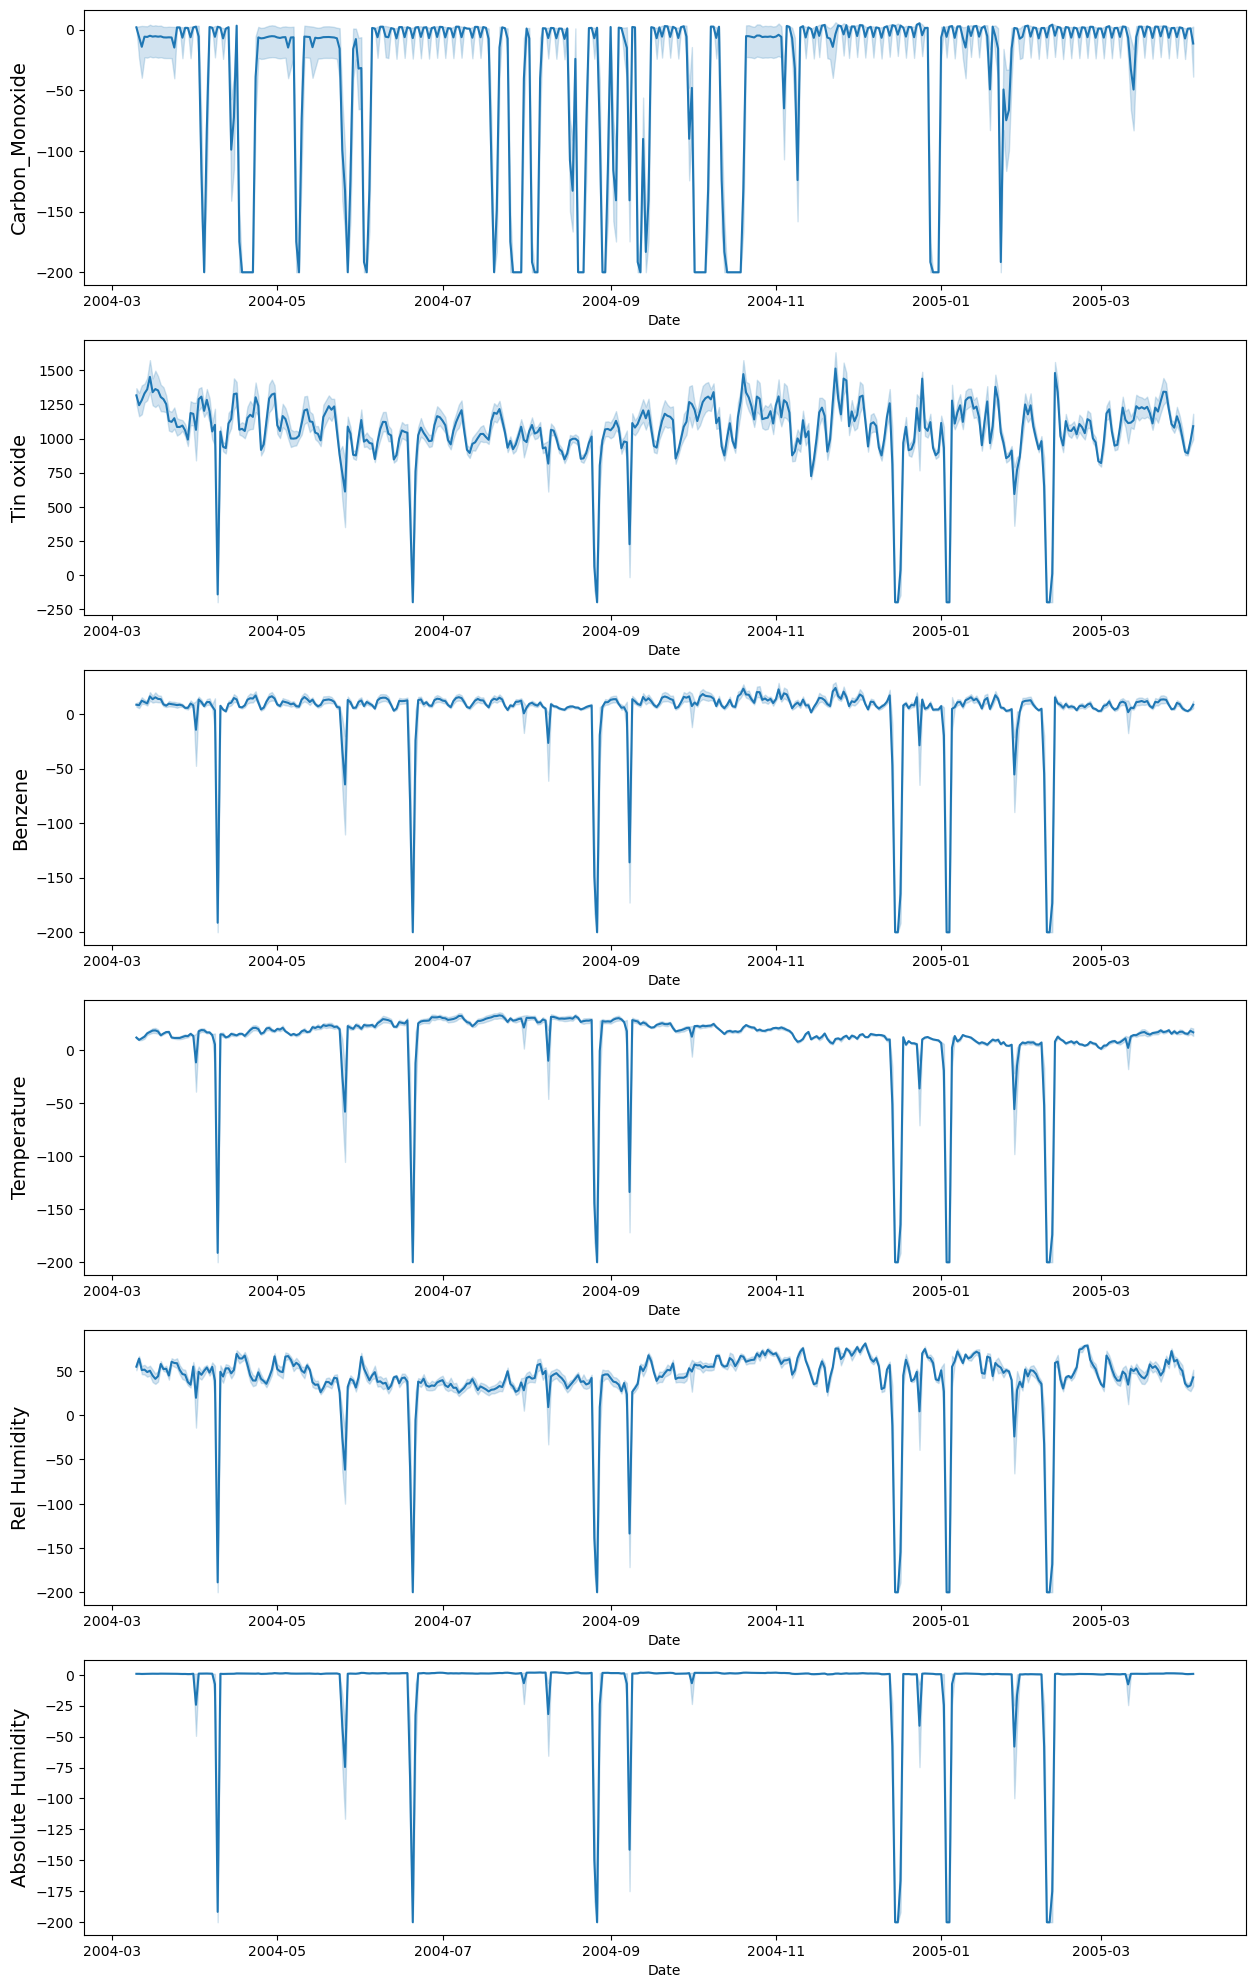

In [20]:
f, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 25))
non_date_data = data.drop(['Date' , 'Time'] , axis = 1)
for i, column in enumerate(non_date_data.columns):
    sns.lineplot(x=data['Date'], y=data[column],ax=axes[i])
    axes[i].set_ylabel(ylabel=column, fontsize=14)

In [1]:
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day
data['day_of_year'] = pd.DatetimeIndex(data['Date']).dayofyear
data['week_of_year'] = pd.DatetimeIndex(data['Date']).weekofyear
data['year'] = pd.DatetimeIndex(data['Date']).year
data['quarter'] = pd.DatetimeIndex(data['Date']).quarter
data['season'] = data['month'] % 12 // 3 + 1

data[['Date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

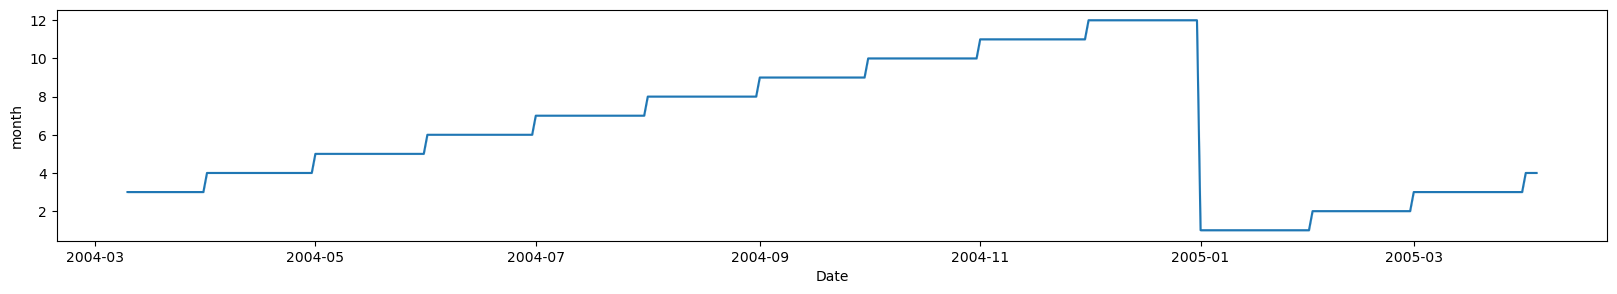

In [22]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))
sns.lineplot(x=data['Date'], y=data['month'])
plt.show()

From the above graph , we can tell that all months are not equally distributed over the years for the given dataset . This Could cause a problem in the future while predicting 

Rolling Statistics

In [2]:
average = data[columns_under_study].rolling(window = 12).mean() #Rolling Average year
std = data[columns_under_study].rolling(window = 12).std() #Rolling Standard Deviation

In [24]:
average = average.dropna(axis = 0)
std = std.dropna(axis = 0)

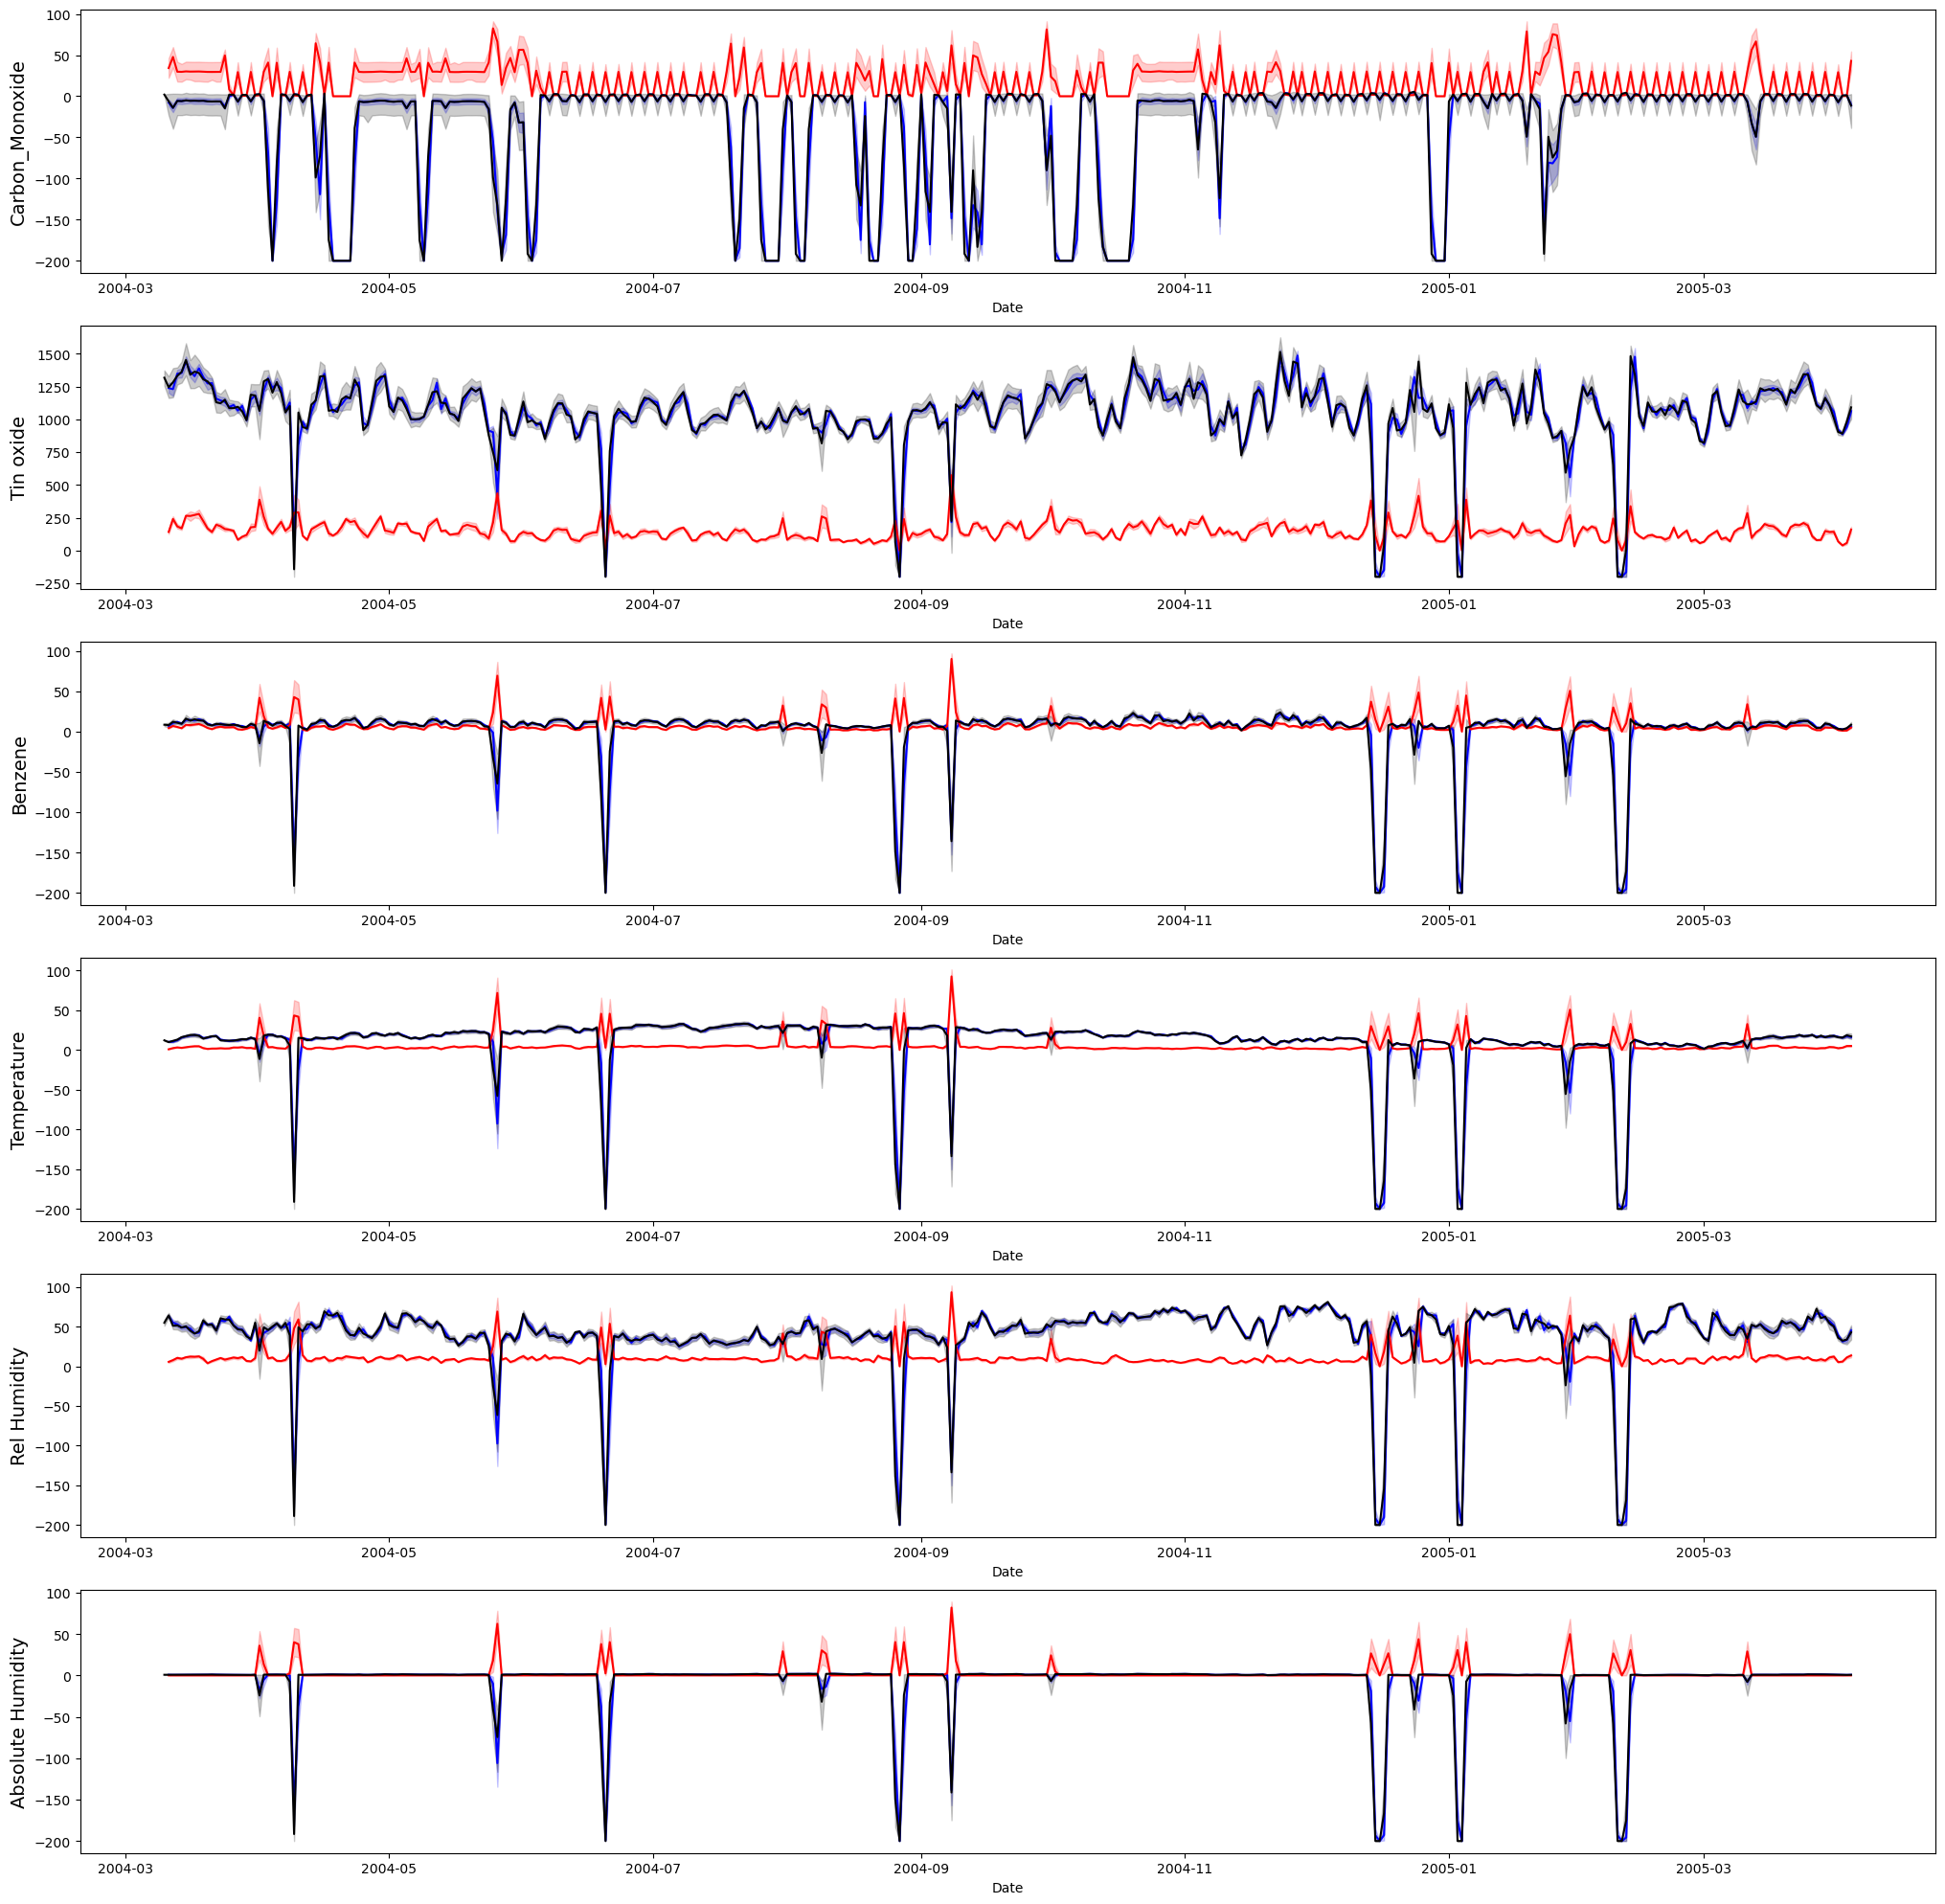

In [25]:
f, axes = plt.subplots(nrows=6, ncols=1, figsize=(25, 25))
for i, column in enumerate(average.columns):
    sns.lineplot(x=data['Date'], y=average[column],ax=axes[i] , color = 'blue')
    sns.lineplot(x=data['Date'], y=std[column],ax=axes[i] , color = 'red')
    sns.lineplot(x = data['Date'] , y = data[column] , ax = axes[i] , color = 'black')
    axes[i].set_ylabel(ylabel=column, fontsize=14)

In [26]:
for i in data[columns_under_study[2:]]:
    result = adfuller(data[i].values)
    print(result[1])

2.5537621262013337e-16
3.7336413229745753e-19
5.622890357386234e-20
8.666323734042307e-20
1.9409443337658783e-17
1.8681846756613387e-20


After looking at al lthe p values , we can say that all the columns dont have any auto correlation

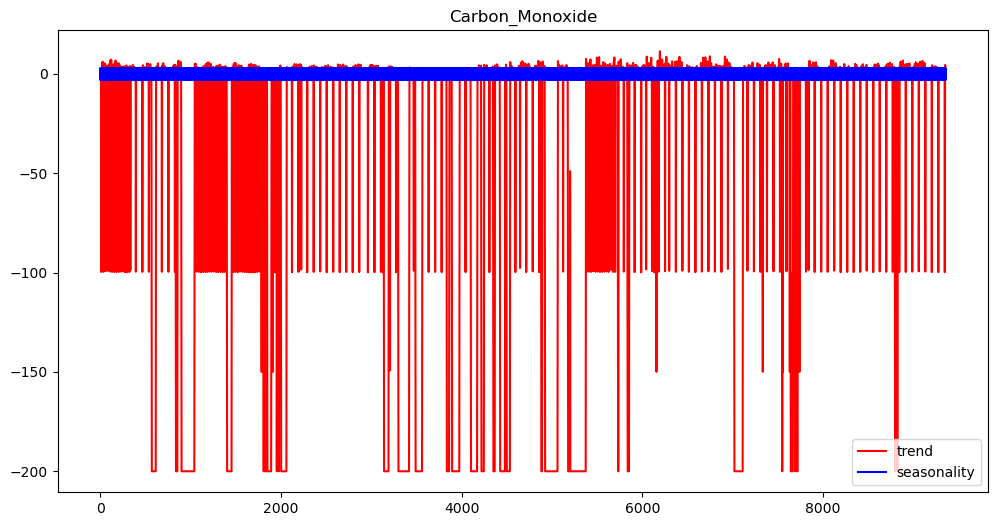

In [27]:
decompose = seasonal_decompose(data['Carbon_Monoxide'] , period = 2)
trend = decompose.trend
seasonal = decompose.seasonal
plt.figure(figsize = (12 , 6))
plt.plot(trend , c = 'red' , label = 'trend')
plt.plot(seasonal , c = 'blue' , label = 'seasonality')
plt.title('Carbon_Monoxide')
plt.legend()

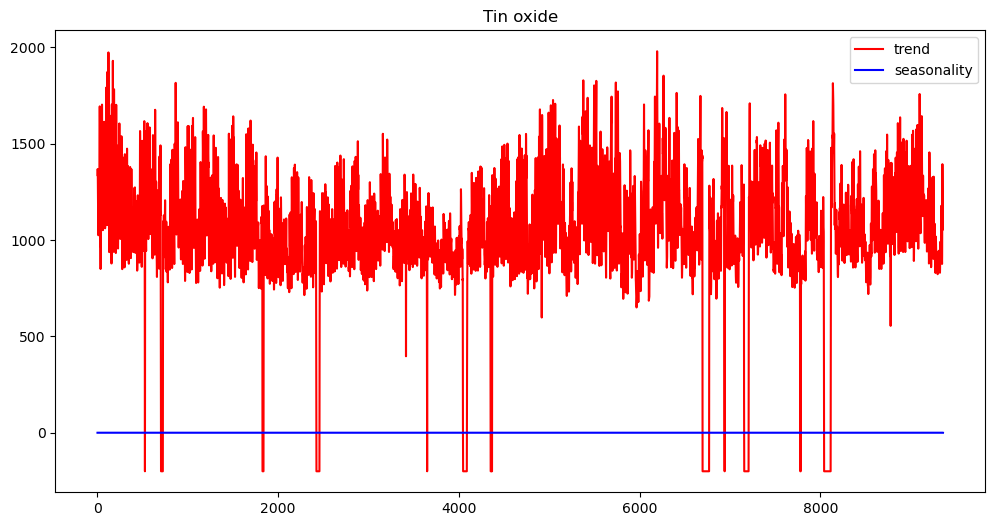

In [28]:
decompose = seasonal_decompose(data['Tin oxide'] , period = 2)
trend = decompose.trend
seasonal = decompose.seasonal
plt.figure(figsize = (12 , 6))
plt.plot(trend , c = 'red' , label = 'trend')
plt.plot(seasonal , c = 'blue' , label = 'seasonality')
plt.title('Tin oxide')
plt.legend()

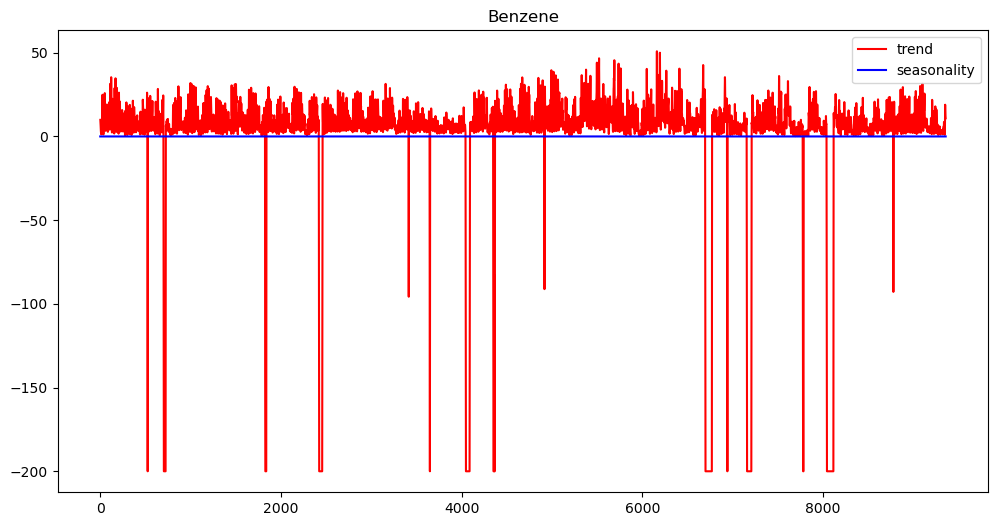

In [29]:
decompose = seasonal_decompose(data['Benzene'] , period = 2)
trend = decompose.trend
seasonal = decompose.seasonal
plt.figure(figsize = (12 , 6))
plt.plot(trend , c = 'red' , label = 'trend')
plt.plot(seasonal , c = 'blue' , label = 'seasonality')
plt.title('Benzene')
plt.legend()

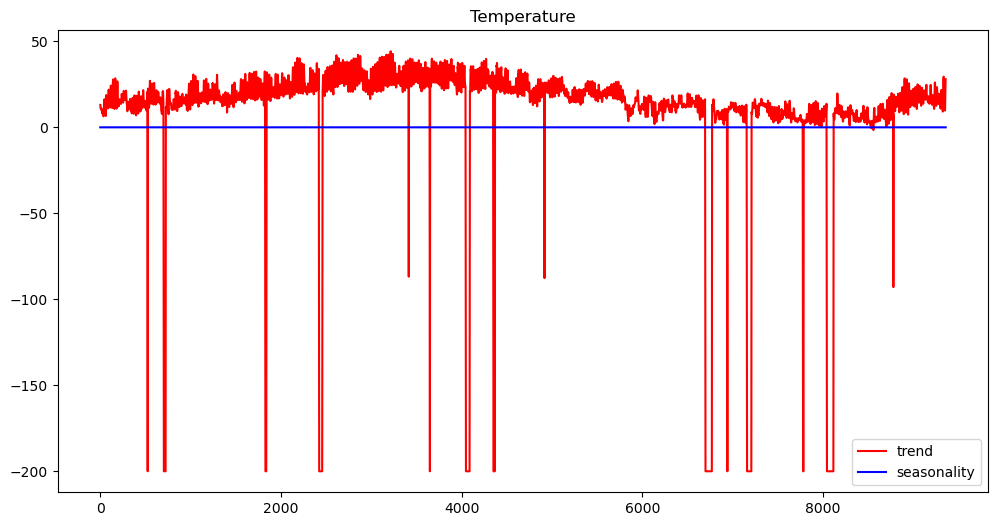

In [30]:
decompose = seasonal_decompose(data['Temperature'] , period = 2)
trend = decompose.trend
seasonal = decompose.seasonal
plt.figure(figsize = (12 , 6))
plt.plot(trend , c = 'red' , label = 'trend')
plt.plot(seasonal , c = 'blue' , label = 'seasonality')
plt.title('Temperature')
plt.legend()

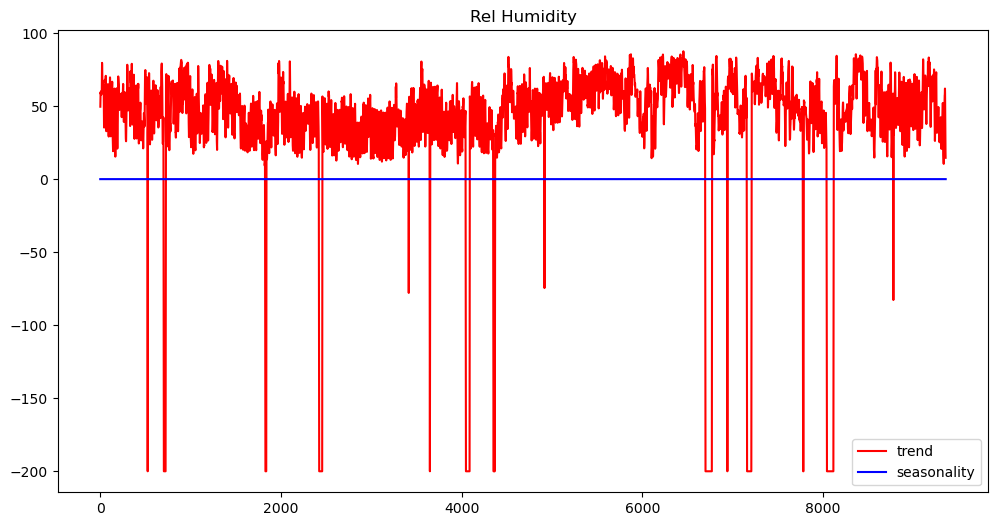

In [31]:
decompose = seasonal_decompose(data['Rel Humidity'] , period = 2)
trend = decompose.trend
seasonal = decompose.seasonal
plt.figure(figsize = (12 , 6))
plt.plot(trend , c = 'red' , label = 'trend')
plt.plot(seasonal , c = 'blue' , label = 'seasonality')
plt.title('Rel Humidity')
plt.legend()

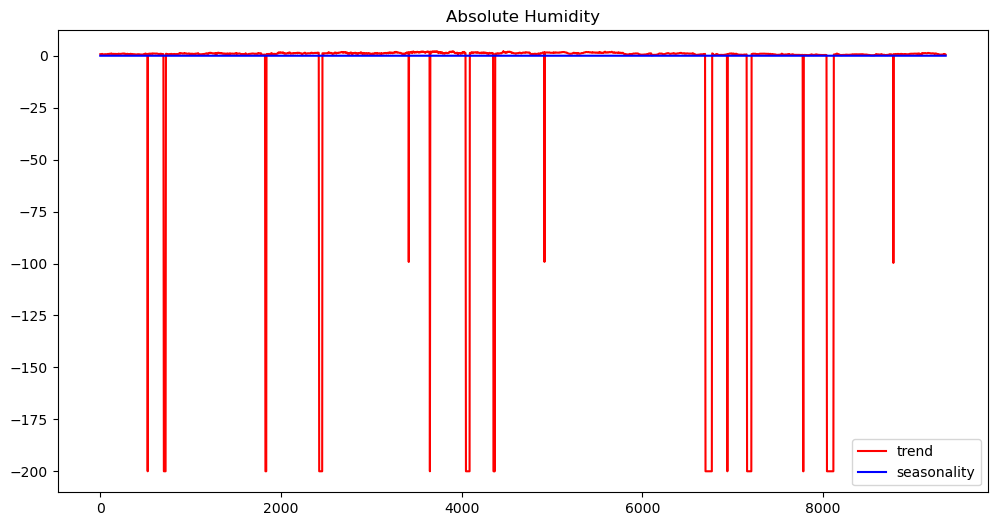

In [32]:
decompose = seasonal_decompose(data['Absolute Humidity'] , period = 2)
trend = decompose.trend
seasonal = decompose.seasonal
plt.figure(figsize = (12 , 6))
plt.plot(trend , c = 'red' , label = 'trend')
plt.plot(seasonal , c = 'blue' , label = 'seasonality')
plt.title('Absolute Humidity')
plt.legend()

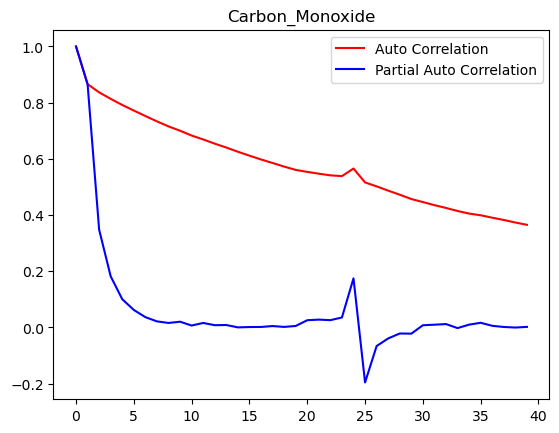

In [33]:
acf_data = acf(data['Carbon_Monoxide'])
pacf_data = pacf(data['Carbon_Monoxide'])
plt.plot(acf_data , color = 'r'  , label = 'Auto Correlation')
plt.plot(pacf_data , color = 'b'  , label = 'Partial Auto Correlation')
plt.title('Carbon_Monoxide')
plt.legend()

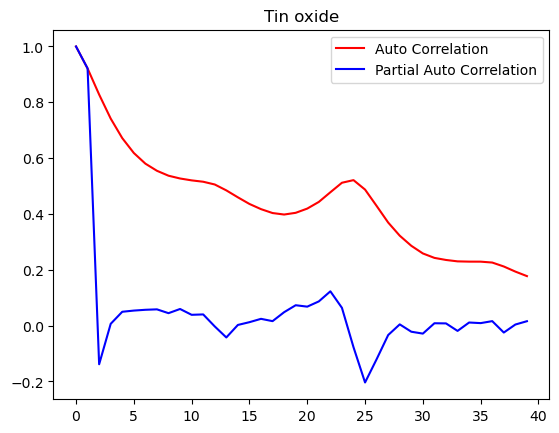

In [34]:
acf_data = acf(data['Tin oxide'])
pacf_data = pacf(data['Tin oxide'])
plt.plot(acf_data , color = 'r'  , label = 'Auto Correlation')
plt.plot(pacf_data , color = 'b'  , label = 'Partial Auto Correlation')
plt.title('Tin oxide')
plt.legend()

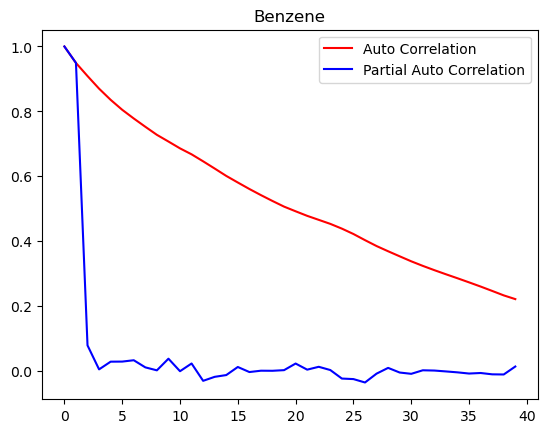

In [35]:
acf_data = acf(data['Benzene'])
pacf_data = pacf(data['Benzene'])
plt.plot(acf_data , color = 'r'  , label = 'Auto Correlation')
plt.plot(pacf_data , color = 'b'  , label = 'Partial Auto Correlation')
plt.title('Benzene')
plt.legend()

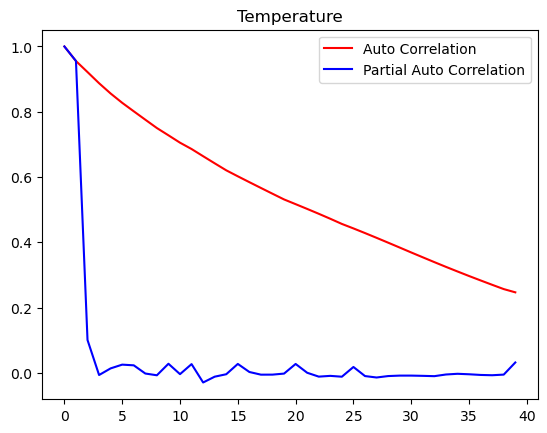

In [36]:
acf_data = acf(data['Temperature'])
pacf_data = pacf(data['Temperature'])
plt.plot(acf_data , color = 'r'  , label = 'Auto Correlation')
plt.plot(pacf_data , color = 'b'  , label = 'Partial Auto Correlation')
plt.title('Temperature')
plt.legend()

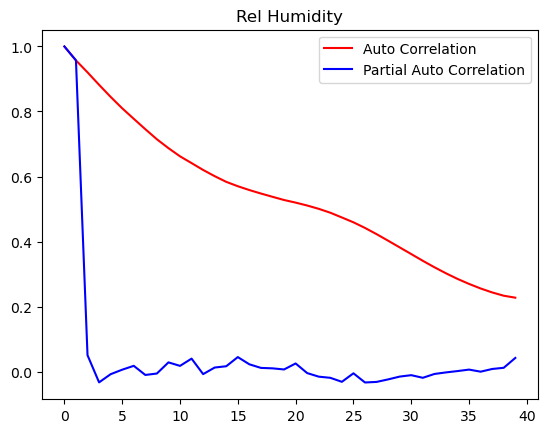

In [37]:
acf_data = acf(data['Rel Humidity'])
pacf_data = pacf(data['Rel Humidity'])
plt.plot(acf_data , color = 'r'  , label = 'Auto Correlation')
plt.plot(pacf_data , color = 'b'  , label = 'Partial Auto Correlation')
plt.title('Rel Humidity')
plt.legend()

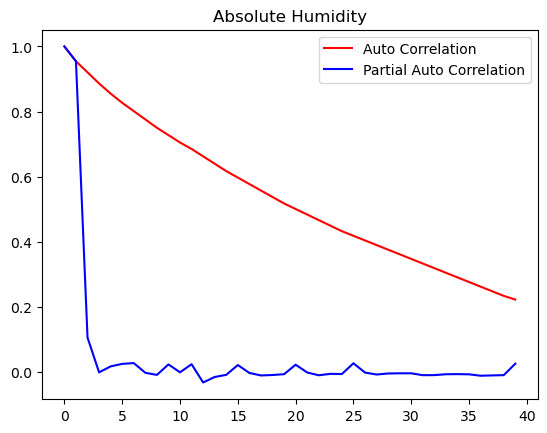

In [38]:
acf_data = acf(data['Absolute Humidity'])
pacf_data = pacf(data['Absolute Humidity'])
plt.plot(acf_data , color = 'r'  , label = 'Auto Correlation')
plt.plot(pacf_data , color = 'b'  , label = 'Partial Auto Correlation')
plt.title('Absolute Humidity')
plt.legend()

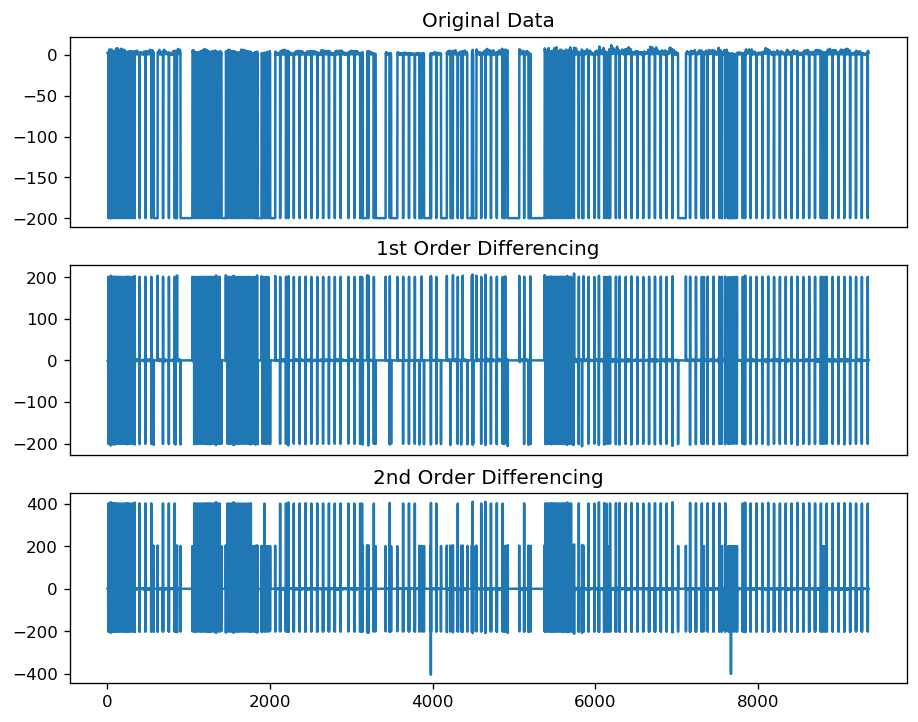

In [39]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data['Carbon_Monoxide'])
ax1.set_title('Original Data')
ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data.Carbon_Monoxide.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data.Carbon_Monoxide.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

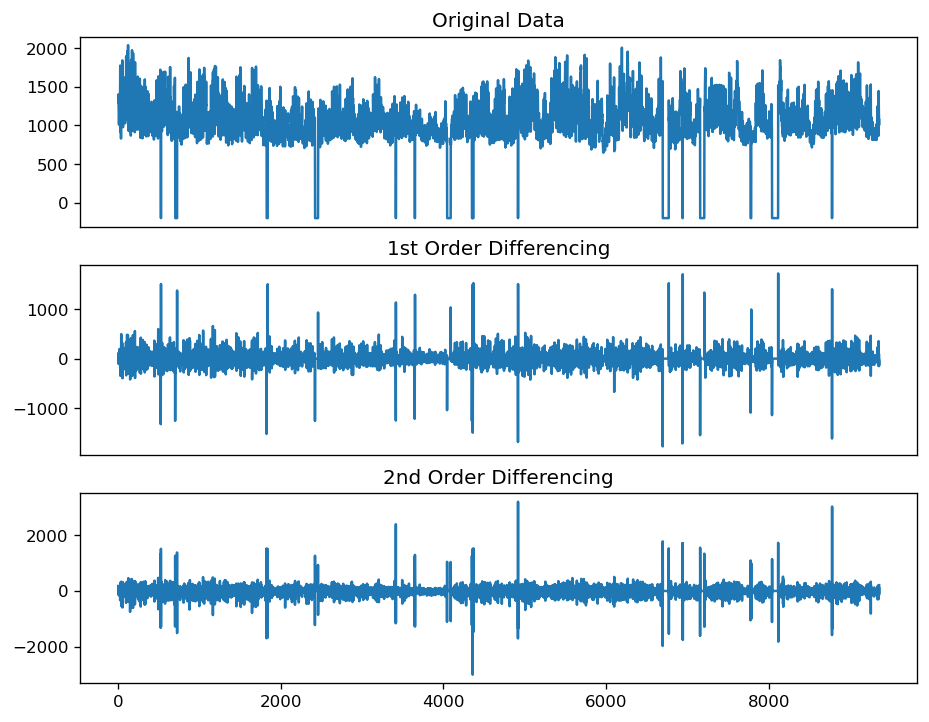

In [40]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data['Tin oxide'])
ax1.set_title('Original Data')
ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data['Tin oxide'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data['Tin oxide'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

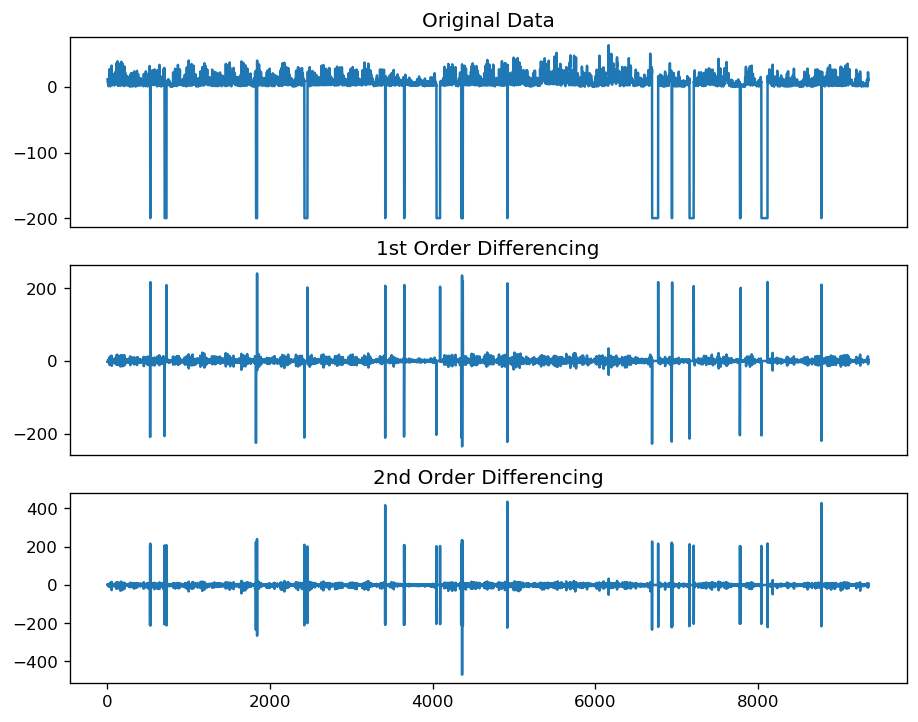

In [41]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data['Benzene'])
ax1.set_title('Original Data')
ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data.Benzene.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data.Benzene.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

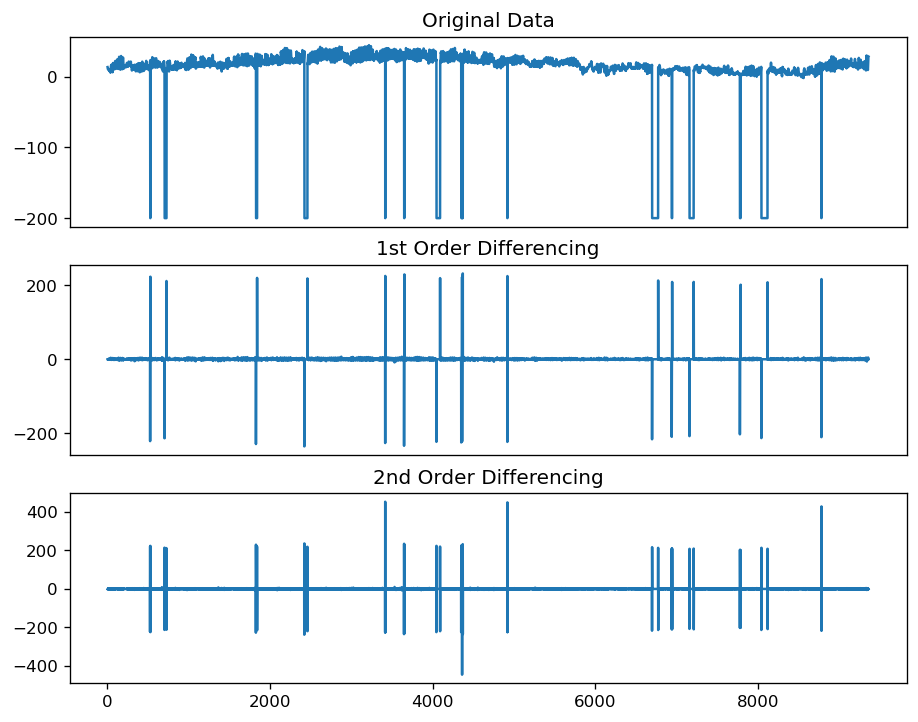

In [42]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data['Temperature'])
ax1.set_title('Original Data')
ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data.Temperature.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data.Temperature.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

In [43]:
model = ARIMA(data['Temperature'] , order = (1, 1 ,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Temperature   No. Observations:                 9357
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -37124.865
Date:                Fri, 14 Apr 2023   AIC                          74255.729
Time:                        20:14:20   BIC                          74277.160
Sample:                             0   HQIC                         74263.008
                               - 9357                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8075      0.007    121.398      0.000       0.794       0.821
ma.L1         -0.8835      0.006   -143.137      0.000      -0.896      -0.871
sigma2       163.7308      0.244    671.538      0.000     163.253     164.209
===================================================================================
Ljung-Box (L1) (Q):                  27.93   Jarque-Bera (JB):          29559148.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                       278.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

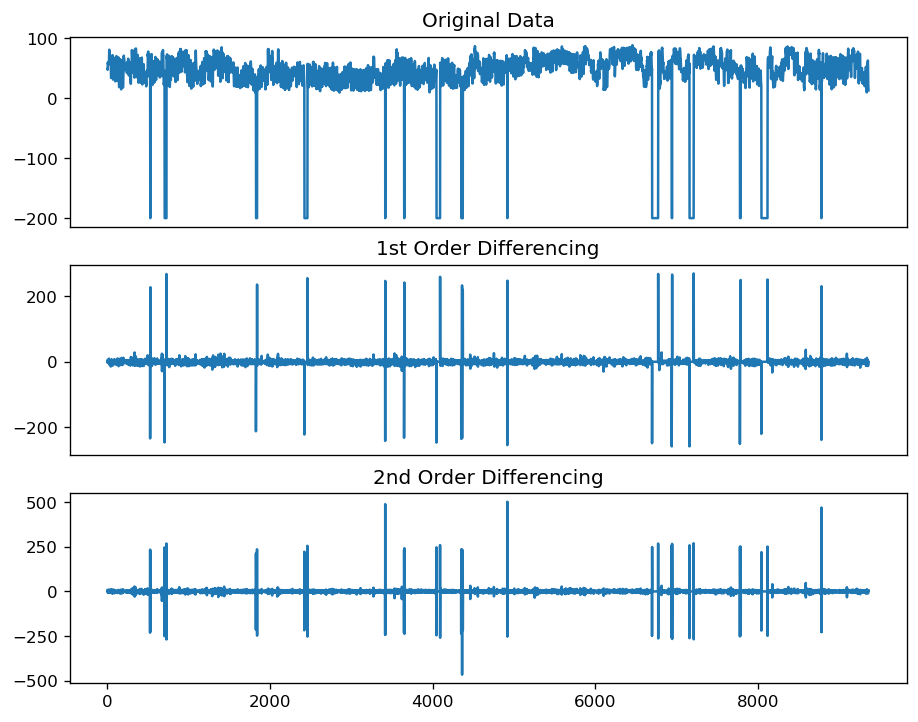

In [44]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data['Rel Humidity'])
ax1.set_title('Original Data')
ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data['Rel Humidity'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data['Rel Humidity'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

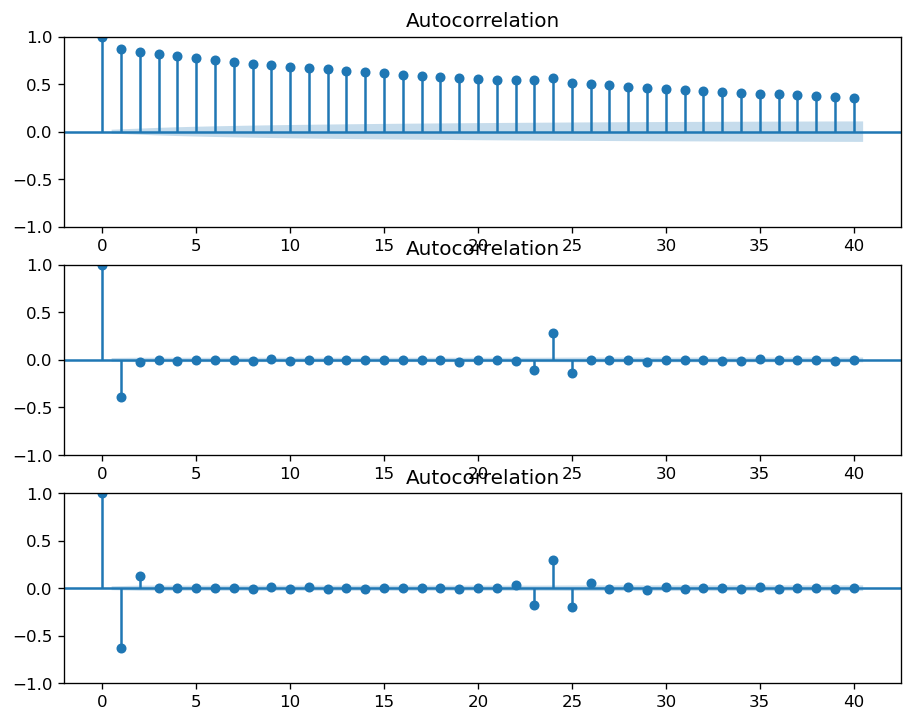

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data.Carbon_Monoxide, ax=ax1);
plot_acf(data.Carbon_Monoxide.diff().dropna(), ax=ax2);
plot_acf(data.Carbon_Monoxide.diff().diff().dropna(), ax=ax3);

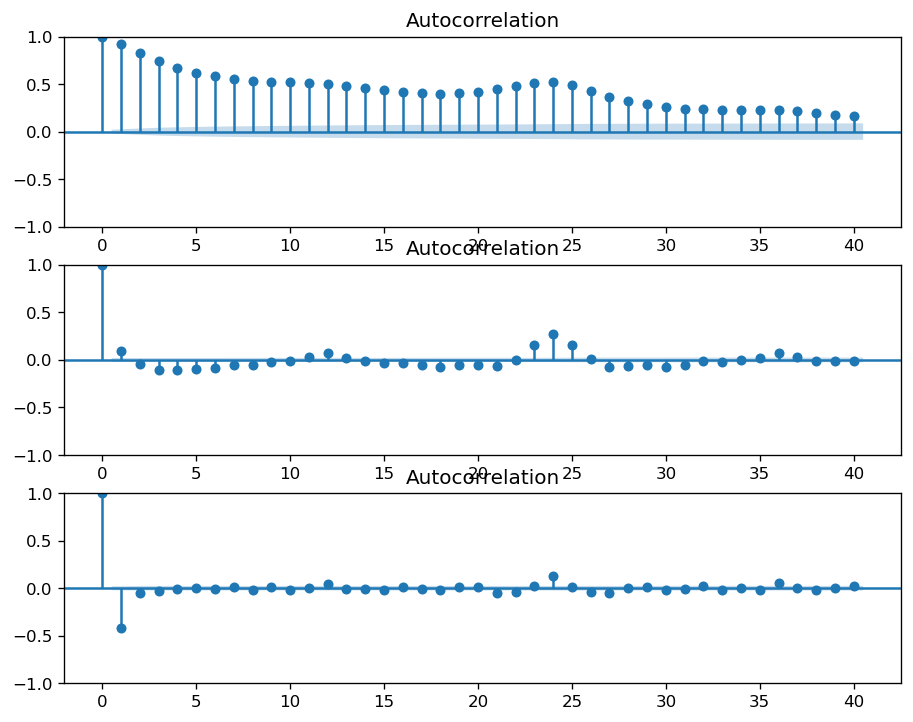

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data['Tin oxide'], ax=ax1);
plot_acf(data['Tin oxide'].diff().dropna(), ax=ax2);
plot_acf(data['Tin oxide'].diff().diff().dropna(), ax=ax3);

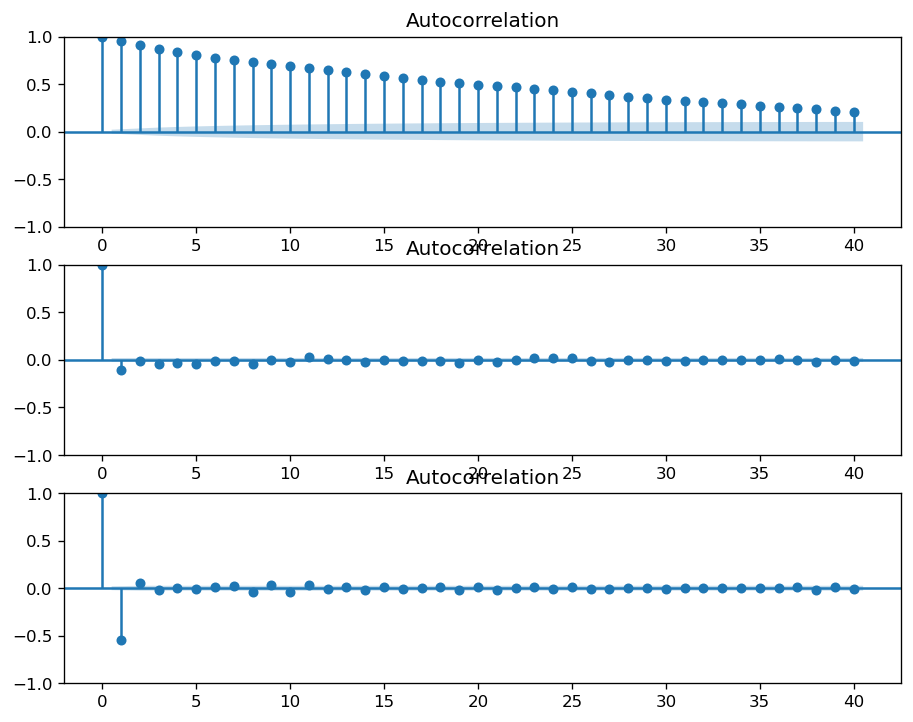

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data.Benzene, ax=ax1);
plot_acf(data.Benzene.diff().dropna(), ax=ax2);
plot_acf(data.Benzene.diff().diff().dropna(), ax=ax3);

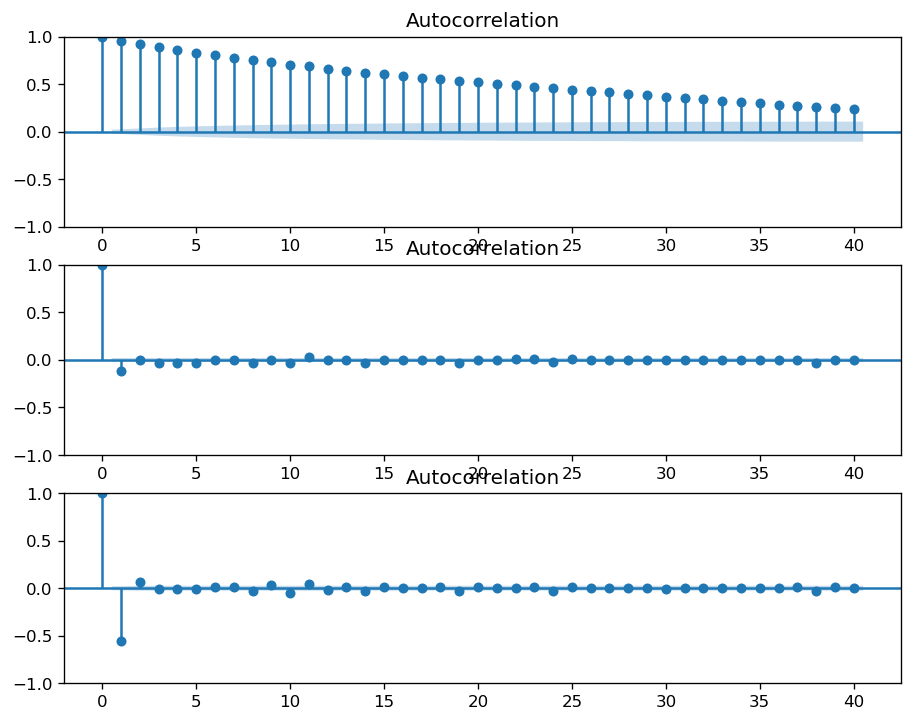

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data.Temperature, ax=ax1);
plot_acf(data.Temperature.diff().dropna(), ax=ax2);
plot_acf(data.Temperature.diff().diff().dropna(), ax=ax3);

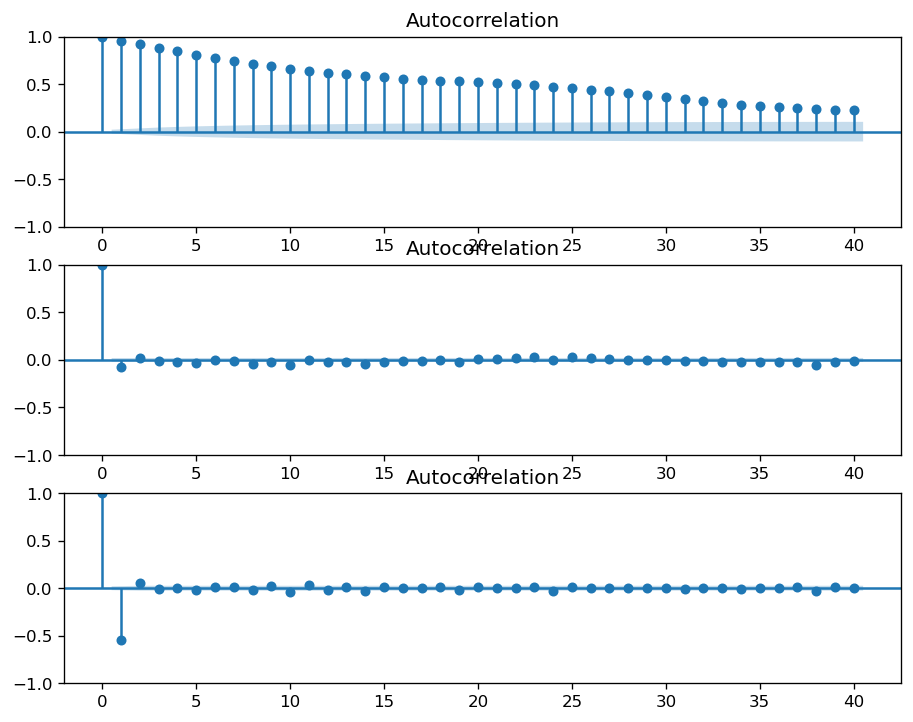

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data['Rel Humidity'], ax=ax1);
plot_acf(data['Rel Humidity'].diff().dropna(), ax=ax2);
plot_acf(data['Rel Humidity'].diff().diff().dropna(), ax=ax3);

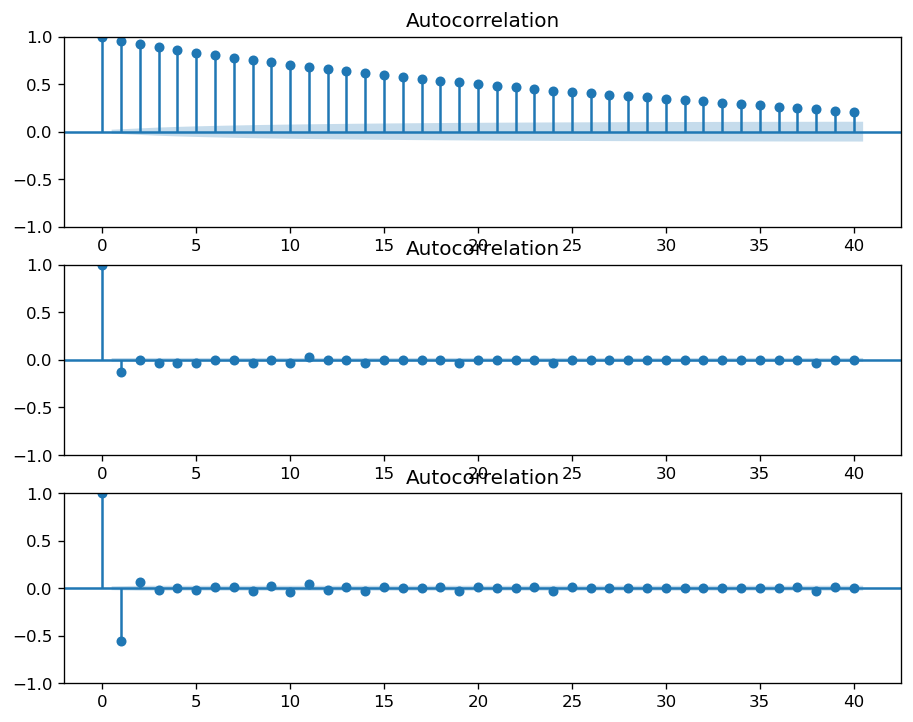

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data['Absolute Humidity'], ax=ax1);
plot_acf(data['Absolute Humidity'].diff().dropna(), ax=ax2);
plot_acf(data['Absolute Humidity'].diff().diff().dropna(), ax=ax3);

In [51]:
model = ARIMA(data['Carbon_Monoxide'] , order = (1, 1 ,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Carbon_Monoxide   No. Observations:                 9357
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -46735.122
Date:                Fri, 14 Apr 2023   AIC                          93476.244
Time:                        20:14:24   BIC                          93497.676
Sample:                             0   HQIC                         93483.523
                               - 9357                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1044      0.012      8.394      0.000       0.080       0.129
ma.L1         -0.6178      0.011    -54.394      0.000      -0.640      -0.595
sigma2      1277.1937      5.448    234.442      0.000    1266.516    1287.871
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            196035.35
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -2.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model = ARIMA(data['Rel Humidity'] , order = (1, 1 ,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Rel Humidity   No. Observations:                 9357
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -38578.181
Date:                Fri, 14 Apr 2023   AIC                          77162.362
Time:                        20:14:24   BIC                          77183.794
Sample:                             0   HQIC                         77169.641
                               - 9357                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2851      0.118     -2.419      0.016      -0.516      -0.054
ma.L1          0.2158      0.118      1.831      0.067      -0.015       0.447
sigma2       223.4557      0.313    713.050      0.000     222.841     224.070
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          21957548.13
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                       240.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
model = ARIMA(data['Absolute Humidity'] , order = (1, 1 ,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Absolute Humidity   No. Observations:                 9357
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -36248.113
Date:                Fri, 14 Apr 2023   AIC                          72502.226
Time:                        20:14:25   BIC                          72523.658
Sample:                             0   HQIC                         72509.505
                               - 9357                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6352      0.012     52.944      0.000       0.612       0.659
ma.L1         -0.7378      0.012    -63.563      0.000      -0.761      -0.715
sigma2       135.7417      0.188    720.291      0.000     135.372     136.111
===================================================================================
Ljung-Box (L1) (Q):                   8.95   Jarque-Bera (JB):          30845062.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                       284.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
model = ARIMA(data['Tin oxide'] , order = (1, 1 ,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Tin oxide   No. Observations:                 9357
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -58831.524
Date:                Fri, 14 Apr 2023   AIC                         117669.049
Time:                        20:14:26   BIC                         117690.480
Sample:                             0   HQIC                        117676.327
                               - 9357                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.099     -1.288      0.198      -0.320       0.066
ma.L1          0.2260      0.099      2.290      0.022       0.033       0.419
sigma2      1.698e+04     51.617    328.944      0.000    1.69e+04    1.71e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):           1090041.20
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.24
Prob(H) (two-sided):                  0.55   Kurtosis:                        55.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
model = ARIMA(data['Benzene'] , order = (1, 1 ,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Benzene   No. Observations:                 9357
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -37308.574
Date:                Fri, 14 Apr 2023   AIC                          74623.149
Time:                        20:14:27   BIC                          74644.580
Sample:                             0   HQIC                         74630.427
                               - 9357                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8172      0.006    142.718      0.000       0.806       0.828
ma.L1         -0.9002      0.005   -174.405      0.000      -0.910      -0.890
sigma2       170.2785      0.282    603.997      0.000     169.726     170.831
===================================================================================
Ljung-Box (L1) (Q):                  11.16   Jarque-Bera (JB):          20465476.59
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                       232.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""